<a href="https://colab.research.google.com/github/surodoot/Python/blob/main/double_pendulum_simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

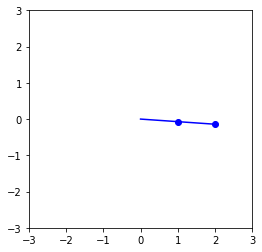

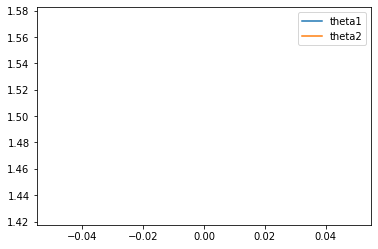

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation as animation
import math

theta1 = 1.5
theta2 = 1.5
m1 = 1
m2 = 1
l1 = 1
l2 = 1
g = 9.8

dt = 0.01
dtheta1 = 0
dtheta2 = 0
ddtheta1 = 0
ddtheta2 = 0

linex1 = np.array([0, l1*math.cos(theta1 - math.pi/2)])
liney1 = np.array([0, l1*math.sin(theta1 - math.pi/2)])
linex2 = np.array([l1*math.cos(theta1 - math.pi/2), l1*math.cos(theta1 - math.pi/2) + l2*math.cos(theta2 - math.pi/2)])
liney2 = np.array([l1*math.sin(theta1 - math.pi/2), l1*math.sin(theta1 - math.pi/2) + l2*math.sin(theta2 - math.pi/2)])

figure, ax = plt.subplots(figsize=(4,4))
line1, = ax.plot(linex1, liney1, 'b')
line2, = ax.plot(linex2, liney2, 'b')
scatter = ax.scatter(linex2, liney2, c = 'b')
plt.axis([-(l1+l2+1), l1+l2+1, -(l1+l2+1), l1+l2+1])

time = []
trace1 = []
trace2 = []
n = 0;

def update():
    global theta1, dtheta2, dtheta1, theta2, ddtheta1, ddtheta2, linex1, liney1, linex2, liney2, trace1, trace2, time, n
    theta1 += dtheta1 * dt
    theta2 += dtheta2 * dt
    dtheta1 += ddtheta1 * dt
    dtheta2 += ddtheta2 * dt
    ddtheta1 = (-g*(2*m1+m2)*math.sin(theta1)-m2*g*math.sin(theta1-2*theta2)-2*math.sin(theta1-theta2)*m2*((dtheta2**2)*l2+(dtheta1**2)*l1*math.cos(theta1-theta2)))/(l1*(2*m1+m2-m2*(math.cos(2*theta1-2*theta2))))
    ddtheta2 = (2*math.sin(theta1-theta2)*((dtheta1**2)*l1*(m1+m2)+g*(m1+m2)*math.cos(theta1)+(dtheta2**2)*l2*m2*math.cos(theta1-theta2)))/(l2*(2*m1+m2-m2*(math.cos(2*theta1-2*theta2))))
    linex1 = np.array([0, l1*math.cos(theta1 - math.pi/2)])
    liney1 = np.array([0, l1*math.sin(theta1 - math.pi/2)])
    linex2 = np.array([l1*math.cos(theta1 - math.pi/2), l1*math.cos(theta1 - math.pi/2) + l2*math.cos(theta2 - math.pi/2)])
    liney2 = np.array([l1*math.sin(theta1 - math.pi/2), l1*math.sin(theta1 - math.pi/2) + l2*math.sin(theta2 - math.pi/2)])
    trace1 += [theta1]
    trace2 += [theta2]
    time += [dt*n]
    n += 1


def animate(i):
    update()
    line1.set_data(linex1, liney1)
    line2.set_data(linex2, liney2)
    scatter.set_offsets([(linex2[0], liney2[0]), (linex2[1], liney2[1])])

ani = animation(figure, animate , frames=1, interval=dt*1000)

afig, mplanim = b.plot(y={'orb': 'ws'}, 
                       animate=True, save='animations_1.gif', save_kwargs={'writer': 'imagemagick'})

#ani.save(r'animation.gif', writer='Pillow', fps=60)
plt.show()
plt.plot(time, trace1)
plt.plot(time, trace2)
plt.legend(['theta1', 'theta2'])
plt.show()